In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error, r2_score
from scipy.integrate import odeint

In [2]:
def odes(y,t):
    
    # kinetic rate constants (min^-1)

    k1 = 10 ** -2              # endosomal escape
    k2 = 2 * 10 ** -3          # complex formation b/w DNA and nuclear import protein
    k3 = 5 * 10 ** -3          # pDNA degradation
    k4 = 10 ** 3               # association of pDNA complex with NPC
    k5 = 3 * 10 ** -3          # entry of pDNA complex into the nucleus 
    k6 = 10 ** 3               # dissociation of pDNA from the nuclear import protein
    k7 = 10 ** -2              # protein production
    k8 = 7.7 * 10 ** -4        # protein degradation
    
    # assign each ode to a vector element
    
    D_endosome = y[0]
    D_cytosol = y[1]
    DI_cytosol = y[2]
    DI_npc = y[3]
    DI_nucleus = y[4]
    D_nucleus = y[5]
    D_P = y[6]
    
    # define each ode
    
    dD_endosome_dt = -k1 * D_endosome
    dD_cytosol_dt = k1 * D_endosome - k2 * D_cytosol - k3 * D_cytosol
    dDI_cytosol_dt = k2 * D_cytosol - k4 * DI_cytosol
    dDI_npc_dt = k4 * DI_cytosol - k5 * DI_npc
    dDI_nucleus_dt = k5 * DI_npc - k6 * DI_nucleus
    dD_nucleus_dt = k6 * DI_nucleus - k3 * D_nucleus
    dD_P_dt = k7 * D_nucleus - k8 * D_P
    
    return [dD_endosome_dt, dD_cytosol_dt, dDI_cytosol_dt, dDI_npc_dt, dDI_nucleus_dt, dD_nucleus_dt, dD_P_dt]

In [3]:
# initial conditions

y0 = [172, 0, 0, 0, 0, 0, 0]

In [4]:
# time and steps

t_initial = 0           # mins
t_final = 24 * 60         # mins
dt = 1                 # mins
t = np.linspace(t_initial, t_final, int(t_final/dt + 1))

In [5]:
y = odeint(odes,y0,t)

D_endosome = y[:,0]
D_cytosol = y[:,1]
DI_cytosol = y[:,2]
DI_npc = y[:,3]
DI_nucleus = y[:,4]
D_nucleus = y[:,5]
D_P = y[:,6]

Text(0, 0.5, 'Number of molecules (-)')

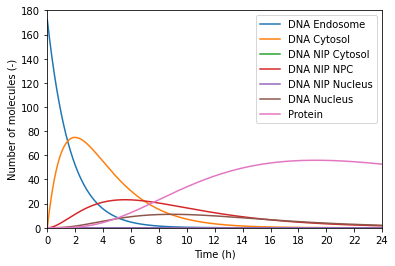

In [6]:
t=t/60 # mins to hrs

plt.plot(t,D_endosome,t,D_cytosol,t,DI_cytosol,t,DI_npc,t,DI_nucleus,t,D_nucleus,t,D_P)
plt.ylim(0,180)
plt.yticks(np.arange(0,200,20))
plt.xlim(0,24)
plt.xticks(np.arange(0,26,2))
plt.legend(['DNA Endosome','DNA Cytosol','DNA NIP Cytosol','DNA NIP NPC','DNA NIP Nucleus','DNA Nucleus','Protein'],loc='upper right')
plt.xlabel('Time (h)')
plt.ylabel('Number of molecules (-)')
